In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import fnmatch
import numpy as np

In [3]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 100

mpl.rcParams['font.family'] = 'serif'

# Spin Overlap Parameter

In [6]:
data = 'Data_RPM_rate0,035_N=50'

Reading the data

In [7]:
df_s = []
df_l = []
for f in listdir(data):
    if fnmatch.fnmatch(f, 'Spins_short_130mT_EXP*'):
        print(f)
        df_s.append(pd.read_csv(join(data,f), sep = "\t", index_col = [0,1]))
    if fnmatch.fnmatch(f, 'Spins_long_130mT_EXP*'):
        df_l.append(pd.read_csv(join(data,f), sep = "\t", index_col = [0,1]))

keys = []
for i in range(len(df_s)):
    keys.append(i)

Spins_short_130mT_EXP13
Spins_short_130mT_EXP41
Spins_short_130mT_EXP17
Spins_short_130mT_EXP35
Spins_short_130mT_EXP19
Spins_short_130mT_EXP27
Spins_short_130mT_EXP46
Spins_short_130mT_EXP42
Spins_short_130mT_EXP34
Spins_short_130mT_EXP3
Spins_short_130mT_EXP10
Spins_short_130mT_EXP6
Spins_short_130mT_EXP30
Spins_short_130mT_EXP22
Spins_short_130mT_EXP32
Spins_short_130mT_EXP36
Spins_short_130mT_EXP18
Spins_short_130mT_EXP9
Spins_short_130mT_EXP39
Spins_short_130mT_EXP11
Spins_short_130mT_EXP48
Spins_short_130mT_EXP45
Spins_short_130mT_EXP5
Spins_short_130mT_EXP20
Spins_short_130mT_EXP49
Spins_short_130mT_EXP40
Spins_short_130mT_EXP2
Spins_short_130mT_EXP38
Spins_short_130mT_EXP44
Spins_short_130mT_EXP26
Spins_short_130mT_EXP37
Spins_short_130mT_EXP0
Spins_short_130mT_EXP43
Spins_short_130mT_EXP28
Spins_short_130mT_EXP24
Spins_short_130mT_EXP25
Spins_short_130mT_EXP21
Spins_short_130mT_EXP1
Spins_short_130mT_EXP47
Spins_short_130mT_EXP14
Spins_short_130mT_EXP33
Spins_short_130mT_EXP12

In [8]:
short = pd.concat(df_s, keys = keys)
long = pd.concat(df_l, keys = keys)

In [9]:
short.index = short.index.rename(["exp", "frame", "id"])

In [10]:
short.index.unique('frame')

Int64Index([371400, 542800, 714200, 885600, 1057000, 1228400, 1399800, 1571200,
            1742600],
           dtype='int64', name='frame')

Multipliying the spins direction at differet cycles values

In [11]:
# < For 130 mT >
def Spm(df, i):
    
    q1 = df.loc[(i,371400)]*df.loc[(i,542800)]
    q2 = df.loc[(i,542800)]*df.loc[(i,714200)]
    q3 = df.loc[(i,714200)]*df.loc[(i,885600)]
    q4 = df.loc[(i,885600)]*df.loc[(i,1057000)]
    q5 = df.loc[(i,1057000)]*df.loc[(i,1228400)]
    q6 = df.loc[(i,1228400)]*df.loc[(i,1399800)]
    q7 = df.loc[(i,1399800)]*df.loc[(i,1571200)]
    q8 = df.loc[(i,1571200)]*df.loc[(i,1742600)]

    q = [q1,q2,q3,q4,q5,q6,q7,q8]
    
    a = []
    for i in q:
        
        a.append((i.sum()/i.count()).values)
        
    
    return a

In [10]:
# < For 100 mT >
#def Spm(df, i):

#    q1 = df.loc[(i,457100)]*df.loc[(i,628500)]
#    q2 = df.loc[(i,628500)]*df.loc[(i,799900)]
#    q3 = df.loc[(i,799900)]*df.loc[(i,971300)]
#    q4 = df.loc[(i,971300)]*df.loc[(i,1142700)]
#    q5 = df.loc[(i,1142700)]*df.loc[(i,1314100)]
#    q6 = df.loc[(i,1314100)]*df.loc[(i,1485500)]
#    q7 = df.loc[(i,1485500)]*df.loc[(i,1656900)]
#    q8 = df.loc[(i,1656900)]*df.loc[(i,1828300)]

#    q = [q1,q2,q3,q4,q5,q6,q7,q8]
    
#    a = []
#    for k in q:
        
#        a.append((k.sum()/k.count()).values)
        
    
#    return a

Doing the same for each experiment (Here N = 10)

In [12]:
def order_data(df):
    exp_f = []
    for i in range(len(df.index.unique(0))):
    
        exp_f.append(Spm(df,i))
    
    return exp_f
    

In [13]:
short.index.unique(0)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
           dtype='int64', name='exp')

In [14]:
df_s = order_data(short)
df_l = order_data(long)

Obtaining the mean value of the Spin Overlap Function over N = 10 experiments

In [15]:
q_f = []
q_err_f = []

def mean_data_and_err(df):
    
    q = np.mean(df, axis = 0)
    q_err = np.std(df,axis = 0)/np.sqrt(len(df))
    q_f = q.flatten()
    q_err_f = q_err.flatten()
    
    return q_f, q_err_f

In [16]:
q_s, q_s_err = mean_data_and_err(df_s)
q_l, q_l_err = mean_data_and_err(df_l)


In [17]:
q_s.flatten()

array([0.27682598, 0.3433464 , 0.36235289, 0.3773848 , 0.38396788,
       0.39620174, 0.39828907, 0.39748602])

In [18]:
d1 = {'S': q_s, 'err': q_s_err}
d2 = {'S': q_l, 'err': q_l_err}


df_s = pd.DataFrame(data=d1)
df_l = pd.DataFrame(data=d2)

In [19]:
df_l.to_csv("SpinOverlapParameter_LongTraps_at_130mT_N=50", sep = "\t")
df_s.to_csv("SpinOverlapParameter_ShortTraps_at_130mT_N=50", sep = "\t")

In [20]:
df_l

,S,err
0,0.343008,0.007768
1,0.432573,0.008119
2,0.459029,0.008980
3,0.464369,0.007992
4,0.485935,0.008684
5,0.494720,0.007781
6,0.496475,0.009388
7,0.503632,0.009414


Plotting results

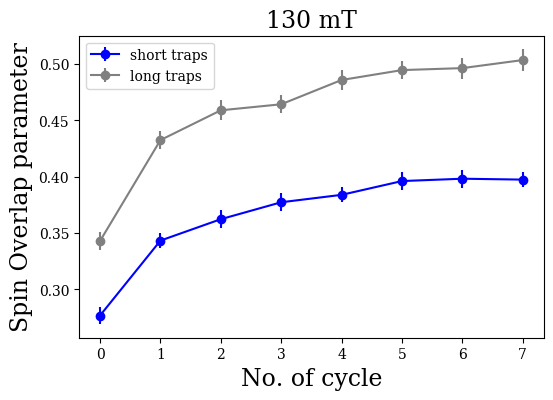

In [22]:
plt.errorbar(y = q_s, x = [0,1,2,3,4,5,6,7], yerr = q_s_err, fmt = '-o' ,label = 'short traps', color = 'blue')
plt.errorbar(y = q_l, x = [0,1,2,3,4,5,6,7], yerr = q_l_err, fmt = '-o', label = 'long traps', color = 'gray')
plt.xlabel('No. of cycle', size = 17)
plt.ylabel('Spin Overlap parameter', size = 17)
plt.title('130 mT', size = 17)
plt.legend()
#plt.savefig('Spin_Overlap_Parameter_130mT_N=50.png', bbox_inches='tight')

In [23]:
10**(-1)

0.1